In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import layers
from  keras import Sequential
import cv2
from PIL import Image

In [26]:
TRAINING_DIR = r"E:\Workstuff\Deeplearnig lab project\train"
VALIDATION_DIR = r"E:\Workstuff\Deeplearnig lab project\valid"
TEST_DIR=r"E:\Workstuff\Deeplearnig lab project\test"

In [28]:
data = ImageDataGenerator( zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2)


train_dg = data.flow_from_directory(TRAINING_DIR,
                                    class_mode = "categorical",
                                    target_size = (299, 299),
                                    batch_size = 32,
                                    shuffle = False,
                                    seed = 42)

Found 3208 images belonging to 20 classes.


In [29]:
data_val = ImageDataGenerator()
validation_dg = data_val.flow_from_directory(VALIDATION_DIR,
                                      class_mode = "categorical",
                                      target_size = (299, 299),
                                      batch_size = 32,
                                      shuffle = False,
                                      seed = 42)

Found 100 images belonging to 20 classes.


In [30]:
testing_dg = data_val.flow_from_directory(TEST_DIR,
                                      class_mode = "categorical",
                                      target_size = (299, 299),
                                      batch_size = 32,
                                      shuffle = False,
                                      seed = 42)

Found 100 images belonging to 20 classes.


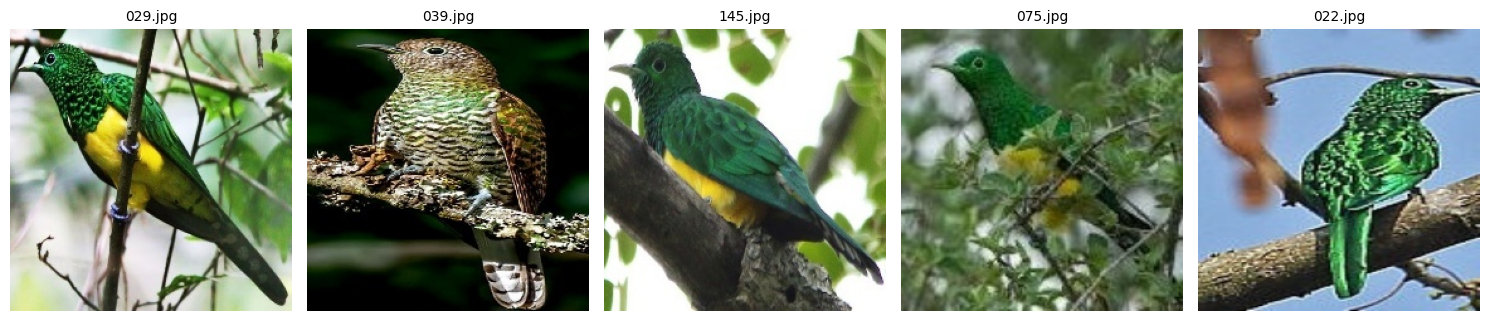

In [21]:
import random
def show_images_with_labels_from_subfolder_name(subfolder_name, num_images=5):
  
  main_folder = TRAINING_DIR
  subfolder_path = os.path.join(main_folder, subfolder_name)

  if not os.path.exists(subfolder_path):
    print(f"Subfolder '{subfolder_name}' does not exist in the main folder.")
    return

  image_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
  random.shuffle(image_files)

  num_images = min(num_images, len(image_files))

  # Set up the plot
  fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 5))
  if num_images == 1:
    axes = [axes]  
  for i, image_file in enumerate(image_files[:num_images]):
    image_path = os.path.join(subfolder_path, image_file)
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"{os.path.basename(image_file)}", fontsize=10)

  plt.tight_layout()
  plt.show()


show_images_with_labels_from_subfolder_name("AFRICAN EMERALD CUCKOO", num_images=5)
